In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import eggp

In this exercise, we attempt to discover a polynomial model that generated three examples. We purposefully generate the examples choosing a free parameter equal to zero. In this configuration, no single example is enough to discover the full functional form that generated each view. However, as demonstrated in Russeil et al. 2024 (https://arxiv.org/abs/2402.04298), a multiview approach - i.e. considering multiple datasets generated by the same function - enables to find the correct solution. 

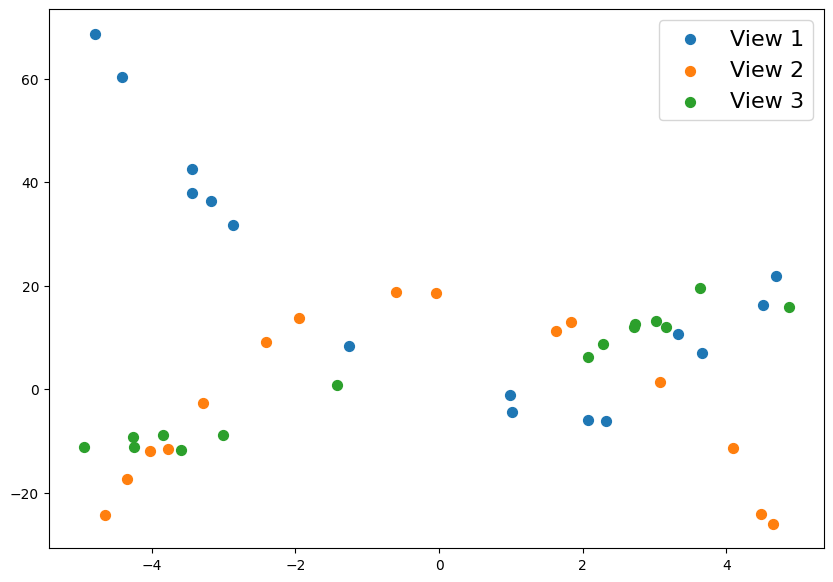

In [9]:
np.random.seed(42)

# Define the true model to discover
def true_func(X, A, B, C):
    return A + B * X + C * X**2


# Define specific parameter values for each example.
true_params = [[0,-5, 2],
               [20, 0, -2],
               [2, 3, 0]]


# Generate the data and plot it 
full_X, full_y = [], []
plt.figure(figsize=(10, 7))
for idx, ps in enumerate(true_params):
    X = np.random.uniform(-5, 5, 15)
    y = true_func(X, *ps)
    yerr = np.random.normal(0, 2, size=len(y))
    plt.scatter(X, y+yerr, label=f'View {idx+1}', s=50)
    full_X += [np.array([X]).T]
    full_y += [y+yerr]

plt.legend(fontsize=16)
plt.show()

In [10]:
# We create a Pyeggp regressor leaving all hyperparameters to default.
reg = eggp.EGGP()
reg.fit_mvsr(full_X, full_y)

# Here we collect the full table of results and plot it
pareto = reg.results
pareto

,id,view,Expression,Numpy,Math,theta,size,loss_train,loss_val,loss_test,maxloss,R2_train,R2_val,R2_test,mdl_train,mdl_val,mdl_test
0,0,0,21.589217270548623,t[0],$$\theta_{0}$$,21.589217270548623,1,532.979453,532.979453,532.979453,532.979453,2.220446e-16,2.220446e-16,2.220446e-16,532.979453,532.979453,532.979453
1,0,1,-2.930612339764867,t[0],$$\theta_{0}$$,-2.930612339764867,1,247.002956,247.002956,247.002956,532.979453,1.110223e-16,1.110223e-16,1.110223e-16,247.002956,247.002956,247.002956
2,0,2,2.667185093303495,t[0],$$\theta_{0}$$,2.667185093303495,1,126.303250,126.303250,126.303250,532.979453,0.000000e+00,0.000000e+00,0.000000e+00,126.303250,126.303250,126.303250
3,1,0,(21.534862886995523 - x0),"(t[0] - x[:, 0])",$$\left(\theta_{0} - x_{0}\right)$$,21.534862886995523,3,428.346651,428.346651,428.346651,428.346651,1.963168e-01,1.963168e-01,1.963168e-01,431.642488,431.642488,431.642488
4,1,1,(-3.2856867579965456 - x0),"(t[0] - x[:, 0])",$$\left(\theta_{0} - x_{0}\right)$$,-3.2856867579965456,3,255.691957,255.691957,255.691957,428.346651,-3.517772e-02,-3.517772e-02,-3.517772e-02,258.987794,258.987794,258.987794
5,1,2,(2.6105987644181523 - x0),"(t[0] - x[:, 0])",$$\left(\theta_{0} - x_{0}\right)$$,2.6105987644181523,3,214.494045,214.494045,214.494045,428.346651,-6.982464e-01,-6.982464e-01,-6.982464e-01,217.789882,217.789882,217.789882
6,2,0,(21.303011895450787 + (x0 * -5.265543575122987)),"(t[0] + (x[:, 0] * t[1]))",$$\left(\theta_{0} + \left(x_{0} \cdot \theta_...,21.303011895450787;-5.265543575122987,5,228.602451,228.602451,228.602451,246.886780,5.710858e-01,5.710858e-01,5.710858e-01,235.533923,235.533923,235.533923
7,2,1,(-2.967195956970522 + (x0 * -0.103030844598327...,"(t[0] + (x[:, 0] * t[1]))",$$\left(\theta_{0} + \left(x_{0} \cdot \theta_...,-2.967195956970522;-0.10303084459832784,5,246.886780,246.886780,246.886780,246.886780,4.703438e-04,4.703438e-04,4.703438e-04,253.818252,253.818252,253.818252
8,2,2,(2.8472358446081776 + (x0 * 3.181877228219174)),"(t[0] + (x[:, 0] * t[1]))",$$\left(\theta_{0} + \left(x_{0} \cdot \theta_...,2.8472358446081776;3.181877228219174,5,5.050724,5.050724,5.050724,246.886780,9.600111e-01,9.600111e-01,9.600111e-01,11.982196,11.982196,11.982196
9,3,0,(x0 * (-4.997185434556597 + (x0 * 1.9710017166...,"(x[:, 0] * (t[0] + (x[:, 0] * t[1])))",$$\left(x_{0} \cdot \left(\theta_{0} + \left(x...,-4.997185434556597;1.97100171661893,7,6.567563,6.567563,6.567563,126.355850,9.876776e-01,9.876776e-01,9.876776e-01,16.271623,16.271623,16.271623


All these solution can be quite confusing at first glance. Let's have a look at the evolution of the loss along the pareto front

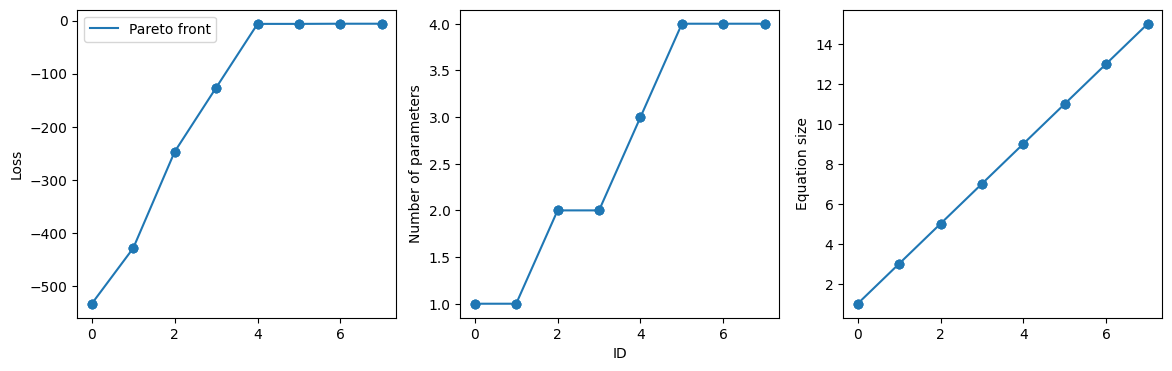

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].plot(pareto['id'], -pareto['maxloss'], label='Pareto front')
ax[0].scatter(pareto['id'], -pareto['maxloss'])
ax[0].set_ylabel('Loss')
ax[0].legend()

n_params = pareto['theta'].apply(lambda x: x.split(';')).apply(len)
ax[1].plot(pareto['id'], n_params)
ax[1].scatter(pareto['id'], n_params)
ax[1].set_xlabel('ID')
ax[1].set_ylabel('Number of parameters')

ax[2].plot(pareto['id'], pareto['size'])
ax[2].scatter(pareto['id'], pareto['size'])
ax[2].set_ylabel('Equation size')

plt.show()

From the study of the pareto front, we see that solution 4 seems to be an excellent solution. Solution 5 and 6 do not lead to significant improvement, despite the increase in complexity in equation size and number of parameters. Therefore we apply Ockam's razor and select the simplest solution.


Let's look at solution 4 in more details:

Best solution :
 f(X0) =  ((X0 + A) * (B - (X0 * C)))


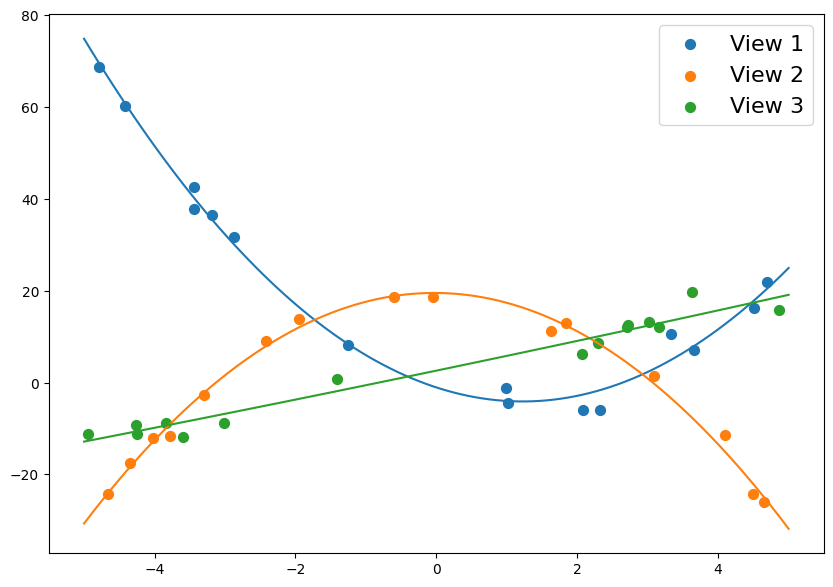

In [12]:
best_id = 4
model, clean_expression = reg.get_model(best_id)
print("Best solution :\n f(X0) = ", clean_expression)


X_smooth = np.array([np.linspace(-5, 5, 100)]).T
solution = pareto[pareto['id']==best_id]

plt.figure(figsize=(10, 7))
for idx in range(len(full_X)):

    params = np.array(solution.iloc[idx]['theta'].split(";"), dtype=float)
    plt.scatter(full_X[idx], full_y[idx], label=f'View {idx+1}', s=50)
    plt.plot(X_smooth, model(X_smooth, params))

plt.legend(fontsize=16)
plt.show()

Huray !! We rediscovered the generating model